# Problem statement

use relevant machine learning model to predect total sales using features like money spent on different
marketing fields

In [47]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [48]:
# load data
data=pd.read_csv("Advertising.csv")

In [1]:
# Domain Analysis
"""This data gives an information about total amount spent on
TV,radio and newspaper advertising and total sales made by company based on that 
investment"""

'This data gives an information about total amount spent on\nTV,radio and newspaper advertising and total sales made by company based on that \ninvestment'

In [50]:
# check for number of row and columns
data.shape

(200, 5)

In [51]:
# print all the column
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [52]:
# print first 5 rows
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [53]:
# print last 5 rows
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [54]:
# find data type
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [55]:
# find info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [56]:
# perform statistical analysis
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [57]:
# check for missing values
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [58]:
# drop unnamed column
data.drop("Unnamed: 0",axis=1,inplace=True)

# Exploratory data analysis

## 1.Univariate analysis

<Axes: xlabel='TV', ylabel='Count'>

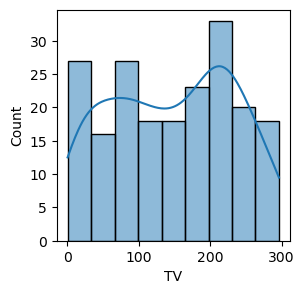

In [59]:
# check the distribution of Tv
plt.figure(figsize=(3,3))
sns.histplot(data=data,x="TV",kde=True)

<Axes: xlabel='Radio', ylabel='Count'>

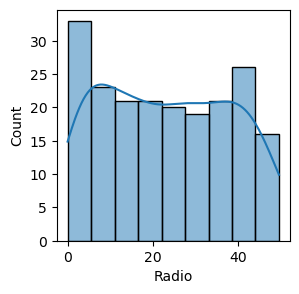

In [60]:
# check the distribution of Radio
plt.figure(figsize=(3,3))
sns.histplot(data=data,x="Radio",kde=True)

<Axes: xlabel='Newspaper', ylabel='Count'>

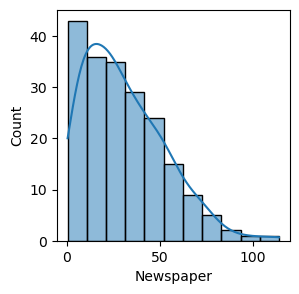

In [61]:
# check the distribution of newspaper
plt.figure(figsize=(3,3))
sns.histplot(data=data,x="Newspaper",kde=True)

<Axes: xlabel='Sales', ylabel='Count'>

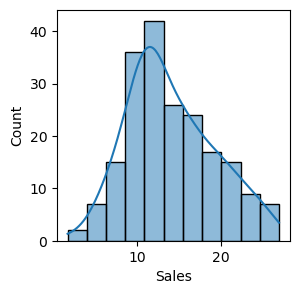

In [62]:
# check the distribution of sales
plt.figure(figsize=(3,3))
sns.histplot(data=data,x="Sales",kde=True)

### insights
* sales represents normal distribution.
* Tv,radio and newspaper are representing non normal distribution.

## 2.bivariate analysis

<Axes: xlabel='TV', ylabel='Sales'>

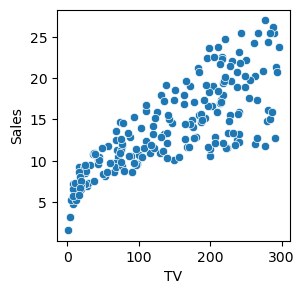

In [64]:
# Analyse relationship between radio and sales
plt.figure(figsize=(3,3))
sns.scatterplot(data=data,x="TV",y="Sales")

#### insights
* there is positive relationship between Tv and Sales
* sales increases as we increase the amount investing on Tv marketing

<Axes: xlabel='Radio', ylabel='Sales'>

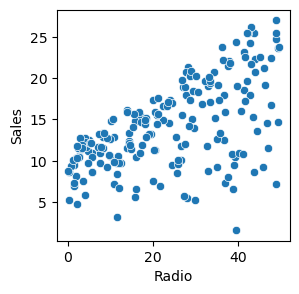

In [66]:
# Analyze relationship between radio and sales
plt.figure(figsize=(3,3))
sns.scatterplot(data=data,x="Radio",y="Sales")

### insights
* sales increases as we invest more in radio advertising
*in some cases we could see drop in sales with high investment

<Axes: xlabel='Newspaper', ylabel='Sales'>

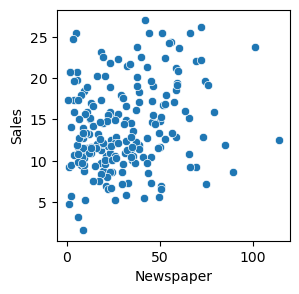

In [68]:
# analyze relationship between newspaper and sales
plt.figure(figsize=(3,3))
sns.scatterplot(data=data,x="Newspaper",y="Sales")

### Insights
* there is no relationship between newspaper and sales.
* even with high or less investment on newspaper advertising it will yield less sales

## final insights
* investing more in tv advertising will be a wise choice to achieve high sales rather
investing in radio and newspaper.
*investing in newspaper is not really a good option

## 3.multivariate analysis

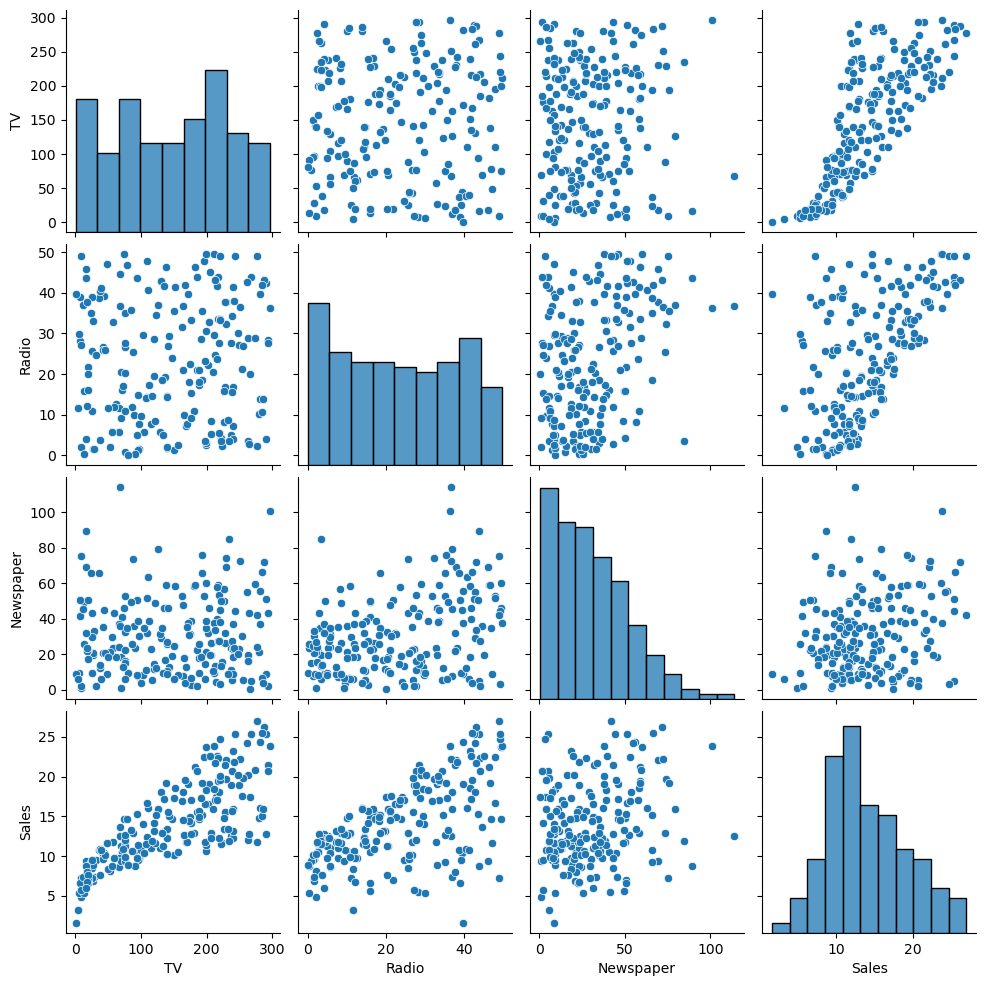

In [71]:
sns.pairplot(data)

# data preprocessing

In [73]:
# check for missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [74]:
# check for duplicates
data.duplicated().sum()

0

#### check for outline and handle them


<Axes: xlabel='TV'>

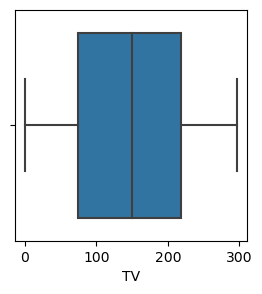

In [75]:
# check outliers in tv
plt.figure(figsize=(3,3))
sns.boxplot(data=data,x="TV")

<Axes: xlabel='Radio'>

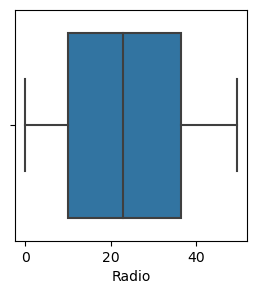

In [76]:
# check outliers in Radio
plt.figure(figsize=(3,3))
sns.boxplot(data=data,x="Radio")

<Axes: xlabel='Newspaper'>

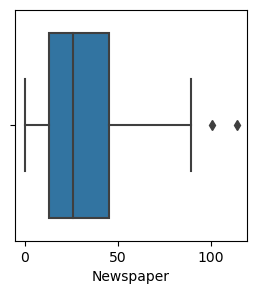

In [77]:
# check outliers in Newspaper
plt.figure(figsize=(3,3))
sns.boxplot(data=data,x="Newspaper")

<Axes: xlabel='Sales'>

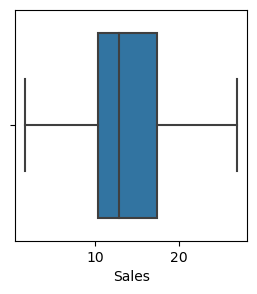

In [78]:
# check outliers in sales
plt.figure(figsize=(3,3))
sns.boxplot(data=data,x="Sales")

In [79]:
# clearly we can see outliers in newspaper column.
# Since distribution of newspaper is not normal will use IQR method to identify outliers.

### IQR method to handle outliers

In [80]:
# find Q1 and Q3
Q1=data['Newspaper'].quantile(0.25)
Q3=data['Newspaper'].quantile(0.75)

#Find IQR
IQR=Q3-Q1
#Find lower limit and upper limit
lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR

In [81]:
print("lower quartile",Q1)
print("upper quatile",Q3)
print("inter quartile range",IQR)
print("lower limit",lower_limit)
print("upper limit",Upper_limit)

lower quartile 12.75
upper quatile 45.1
inter quartile range 32.35
lower limit -35.775000000000006
upper limit 93.625


In [82]:
# Find values less than lower limit 
data.loc[data['Newspaper']<lower_limit]

,TV,Radio,Newspaper,Sales


In [83]:
# find the values greater than upper limit
data.loc[data['Newspaper']>Upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [84]:
# since distribution of newspaper is not normal we replace outliers with median

In [85]:
data.loc[data["Newspaper"]>Upper_limit,'Newspaper']=data['Newspaper'].median()

In [86]:
# again checking for outlier for upper limit
data.loc[data['Newspaper']>Upper_limit]

,TV,Radio,Newspaper,Sales


# Scaling

In [87]:
#import minmax scaler 
from sklearn.preprocessing import MinMaxScaler
#initialise minmaxscaler
scaling=MinMaxScaler()
data[["TV","Radio","Newspaper"]]=scaling.fit_transform(data[["TV","Radio","Newspaper"]])


In [88]:
data

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.773288,22.1
1,0.148123,0.792339,0.502806,10.4
2,0.055800,0.925403,0.774411,9.3
3,0.509976,0.832661,0.653199,18.5
4,0.609063,0.217742,0.652076,12.9
...,...,...,...,...
195,0.126818,0.074597,0.151515,7.6
196,0.316199,0.098790,0.087542,9.7
197,0.596212,0.187500,0.068462,12.8
198,0.956713,0.846774,0.739618,25.5


In [89]:
# skipping converting categorical data into numerical values

## Feature Engineering

In [90]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


<Axes: >

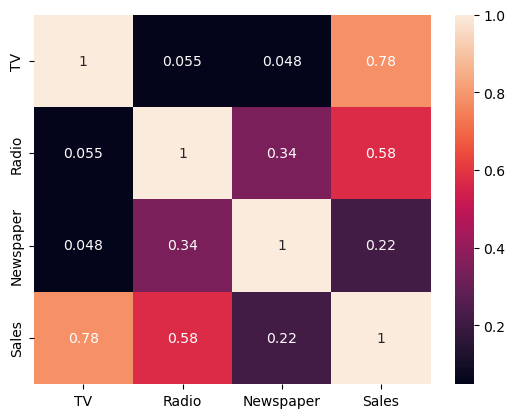

In [91]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

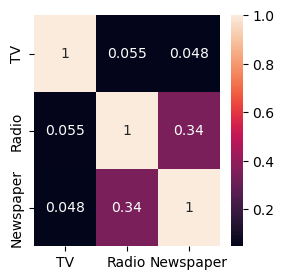

In [92]:
# no or multicoliniarity
plt.figure(figsize=(3,3))
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)

In [93]:
# split data into x and y
x=data.drop('Sales',axis=1)
y=data[['Sales']]

In [94]:
x


,TV,Radio,Newspaper
0,0.775786,0.762097,0.773288
1,0.148123,0.792339,0.502806
2,0.055800,0.925403,0.774411
3,0.509976,0.832661,0.653199
4,0.609063,0.217742,0.652076
...,...,...,...
195,0.126818,0.074597,0.151515
196,0.316199,0.098790,0.087542
197,0.596212,0.187500,0.068462
198,0.956713,0.846774,0.739618


In [95]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [96]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

# Apply linear Regression Model

In [97]:
# import linear regression model
from sklearn.linear_model import LinearRegression
# initialise model
model=LinearRegression()
# train model
model.fit(x_train,y_train)
#make prediction
y_pred=model.predict(x_test)

In [98]:
actual_value=y_test.copy()

In [99]:
actual_value["pred"]=y_pred

In [100]:
actual_value

,Sales,pred
11,17.4,17.119202
99,17.2,16.863431
128,24.7,21.808677
175,27.0,24.554434
1,10.4,12.315519
111,21.8,20.927422
90,11.2,10.104123
177,11.7,12.379025
88,12.9,11.995708
187,17.3,16.953691


In [101]:
y_test

,Sales
11,17.4
99,17.2
128,24.7
175,27.0
1,10.4
111,21.8
90,11.2
177,11.7
88,12.9
187,17.3


# Evaluate the model

In [102]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [103]:
# mean absulute error
MAE=mean_absolute_error(y_test,y_pred)
MAE

1.199298085047556

In [104]:
# mean squared error
MSE=mean_squared_error(y_test,y_pred)
MSE

2.2044386306690202

In [105]:
#root mean squared error
RMSE=np.sqrt(MSE)
RMSE

1.4847352055733778

In [106]:
# R- squared
r2_score(y_test,y_pred)

0.9134809669573121

In [107]:
# adjusted R-square
adj=1-((1-0.913)*(60-1)/(60-3-1))
# R2=0.913
# N=60 ,No of observation in y_test
# p=3 ,no of independent variable

In [108]:
adj

0.9083392857142858

In [111]:
# Cleary adjusted r2 score < r2 score
* the model is 91% better model

# From the above result we can conclude that model is 91% better model

### predict the result for some other values

In [110]:
model.predict([[10000,100,10]])

array([[135134.33570415]])

In [ ]:
# to find slope and intercept

In [135]:
# intercept c
model.intercept_



array([3.12345867])

In [136]:
# m slope
model.coef_

array([[13.42459875,  8.80748724,  0.44759724]])